In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [120]:
df = pd.read_csv("generated_solutions.csv", index_col=0)

names_map = {
    "MOTHERBOARD_score": "placa-mãe",
    "RAM_score": "RAM",
    "SSD_score": "SSD",
    "CPU_score": "CPU",
    "GPU_score": "GPU",
    
    "CPU": "CPU_name",
    "MOTHERBOARD": "MOTHERBOARD_name",
    "SSD": "SSD_name",
    "RAM": "RAM_name",
    "GPU": "GPU_name",
}

uses_names_map = {
    "DEFAULT": "Geral",
    "GAMING": "Jogos",
    "STUDY": "Estudos",
    "VIDEO_EDITING": "Edição de videos"
}

df.computer_use = df.computer_use.map(uses_names_map)
df = df.rename(columns=names_map)

score_columns = ["placa-mãe", "RAM", "SSD", "GPU", "CPU"]

for col in score_columns:
    df[col] *= 0.2
    
df

,computer_use,budget,score,price,CPU_name,CPU,CPU_pond_score,MOTHERBOARD_name,placa-mãe,MOTHERBOARD_pond_score,SSD_name,SSD,SSD_pond_score,RAM_name,RAM,RAM_pond_score,GPU_name,GPU,GPU_pond_score
0,Geral,2500,0.610159,2279.0,Intel Core i7-7800X,0.105128,0.105128,Asus ROG Strix X299-E Gaming,0.140,0.140000,Silicon Power A55 M.2 512GB,0.103030,0.103030,G.Skill Trident Z Royal Elite DDR4-3600 CL14 1...,0.192,0.192000,Asus Strix Radeon R7 370 DirectCU II 2GB,0.070,0.070000
1,Jogos,2500,0.591650,2469.0,Intel Core i3-13100T,0.135897,0.194139,Biostar Z790A-Silver,0.134,0.071786,Adata Ultimate SU650 120GB,0.068687,0.036797,Crucial CT8G48C40U5 DDR5-4800 CL40 8GB (1x8GB),0.104,0.092857,Intel Arc A380,0.122,0.196071
2,Estudos,2500,0.638225,2285.0,AMD Ryzen 3 3200G,0.123077,0.261866,MSI MPG X570S Edge Max WiFi,0.160,0.113475,Silicon Power A55 M.2 64GB,0.111111,0.118203,Silicon Power Zenith RGB Gaming DDR4-3200 CL16...,0.136,0.144681,empty_gpu,0.000,0.000000
3,Edição de videos,2500,0.541735,2467.0,Intel Core i3-13100T,0.135897,0.133233,Biostar Z790A-Silver,0.134,0.013137,Seagate BarraCuda 120 1TB,0.084848,0.124777,Crucial CT8G48C40U5 DDR5-4800 CL40 8GB (1x8GB),0.104,0.050980,MSI Radeon RX 6400 Aero ITX 4G,0.112,0.219608
4,Geral,5000,0.730056,4521.0,AMD Ryzen 7 5700G,0.141026,0.141026,MSI MPG X570S Edge Max WiFi,0.160,0.160000,Silicon Power A55 M.2 512GB,0.103030,0.103030,G.Skill Trident Z Neo DDR4-3600 CL16 16GB (2x8GB),0.200,0.200000,Asus Dual Radeon RX 6650 XT OC Edition,0.126,0.126000
5,Jogos,5000,0.689809,4764.0,Intel Core i9-12900K,0.179487,0.256410,Biostar Z790A-Silver,0.134,0.071786,Silicon Power A55 M.2 128GB,0.101010,0.054113,Kingston Fury Beast RGB DDR5-6000 CL36 32GB (1...,0.132,0.117857,Intel Arc Pro A60,0.118,0.189643
6,Estudos,5000,0.735334,4796.0,Intel Core i7-13700,0.182051,0.387343,MSI Pro Z790-A WiFi,0.168,0.119149,Silicon Power A55 M.2 64GB,0.111111,0.118203,Crucial CT8G48C40U5 DDR5-4800 CL40 8GB (1x8GB),0.104,0.110638,empty_gpu,0.000,0.000000
7,Edição de videos,5000,0.639198,4844.0,Intel Core i5-14500,0.166667,0.163399,Biostar B760MXC Pro,0.098,0.009608,Silicon Power A55 M.2 256GB,0.101010,0.148544,Crucial CT8G48C40U5 DDR5-4800 CL40 8GB (1x8GB),0.104,0.050980,Gainward GeForce RTX 3070 Phantom GS,0.136,0.266667
8,Geral,10000,0.787183,9177.0,Intel Core i7-13700,0.182051,0.182051,MSI MAG Z790 Tomahawk WiFi,0.178,0.178000,Western Digital PC SN720 2TB,0.113131,0.113131,Adata XPG Lancer Blade RGB DDR5-6000 32GB (2x1...,0.174,0.174000,XFX Speedster SWFT 319 Radeon RX 6900 XT Core,0.140,0.140000
9,Jogos,10000,0.788086,7894.0,Intel Core i7-13700K,0.189744,0.271062,MSI MAG B760M Mortar Max WiFi,0.144,0.077143,Silicon Power A55 M.2 64GB,0.111111,0.059524,Adata XPG Lancer Blade RGB DDR5-6000 32GB (2x1...,0.174,0.155357,XFX Speedster SWFT 319 Radeon RX 6900 XT Core,0.140,0.225000


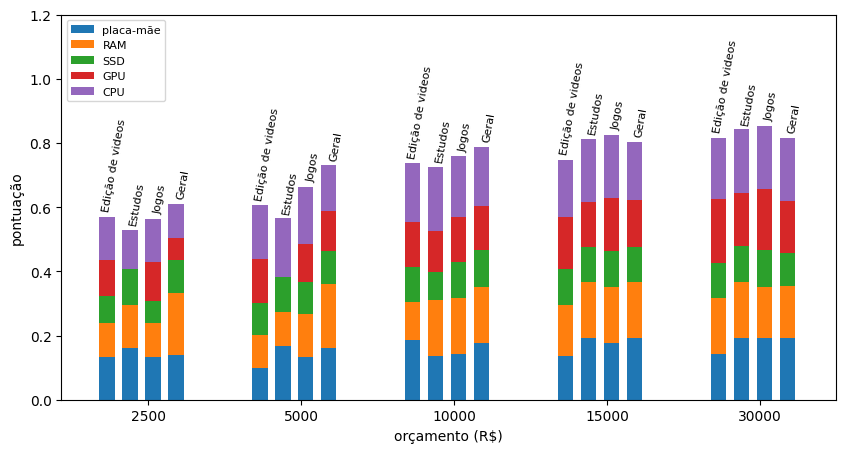

In [136]:

uses = df.computer_use.unique()

fig, ax = plt.subplots(figsize=(10,5))

max_containers = []

for i, use in enumerate(uses):
    legend = (i==0)
    axc = df[df.computer_use == use].plot(kind="bar", x="budget", y=score_columns, stacked=True,
                                   width=0.1, ax=ax, position=(i * 1.5)-1.3, legend=legend, rot=0, xlabel="orçamento (R$)")
    

    max_containers.append(len(ax.containers)-1)
    

for i, use in zip(max_containers, uses):
    bars = ax.containers[i]
    labels = [use for _ in range(5)]
    label_objects = ax.bar_label(bars, labels=labels, padding=3)
    for label in label_objects:
        label.set_rotation(80)
        label.set_fontsize(8)  # Altere o tamanho da fonte conforme necessário
        label.set_x(label.get_position()[0] + 5)
    

# Ajuste o tamanho da fonte da legenda apenas no primeiro plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:len(score_columns)], labels=labels[:len(score_columns)], fontsize=8)
    
ax.set_ylabel("pontuação")
ax.set_xlim(right=len(uses)+0.5)
ax.set_ylim(top=1.2)

fig.savefig("mark_distribution_graph.png")
    

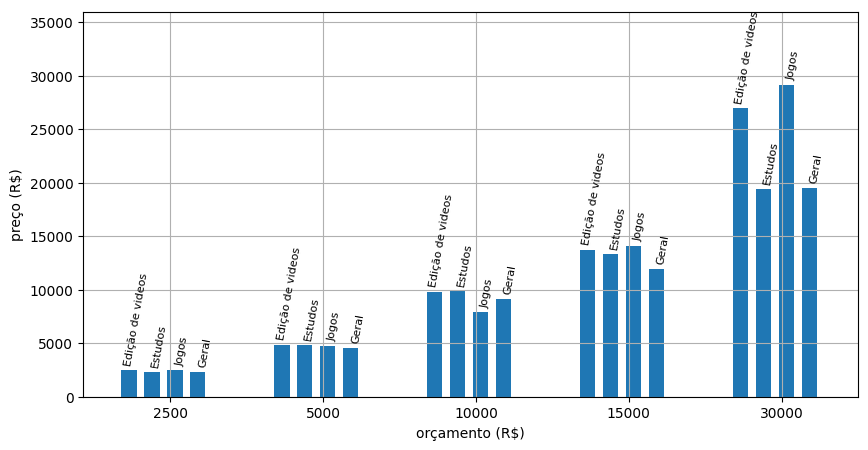

In [137]:

uses = df.computer_use.unique()

fig, ax = plt.subplots(figsize=(10,5))

max_containers = []

for i, use in enumerate(uses):
    axc = df[df.computer_use == use].plot(kind="bar", x="budget", y=["price"], stacked=False, grid=True,
                                   width=0.1, ax=ax, position=(i * 1.5)-1.3, legend=False, rot=0, xlabel="orçamento (R$)")
    

    max_containers.append(len(ax.containers)-1)
    

for i, use in zip(max_containers, uses):
    bars = ax.containers[i]
    labels = [use for _ in range(5)]
    label_objects = ax.bar_label(bars, labels=labels, padding=3)
    for label in label_objects:
        label.set_rotation(80)
        label.set_fontsize(8)  # Altere o tamanho da fonte conforme necessário
        label.set_x(label.get_position()[0] + 5)
    

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[:len(score_columns)], labels=labels[:len(score_columns)], fontsize=8)
    
ax.set_ylabel("preço (R$)")
ax.set_xlim(right=len(uses)+0.5)
ax.set_ylim(top=36000)

fig.savefig("solutions_prices.png")
    